In [1]:
import pyforest

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell`==
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously`==
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ▶  Data Import

In [2]:
df = pd.read_csv('D:\GitHub Repos\WGU_MSDA\D212_Data Mining\medical_clean.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [5]:
# Excluding object columns and only including numerical columns
df1 = df.select_dtypes(exclude=['object'])

In [6]:
df1.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [7]:
# Dropping unrelated columns    
df1.drop(['Population','CaseOrder', 'Zip', 'Lat', 'Lng',
           'Item1', 'Item2', 'Item3', 'Item4', 
           'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace=True)

In [8]:
df1.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420
1,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120
2,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460
3,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350
4,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Initial_days        10000 non-null  float64
 8   TotalCharge         10000 non-null  float64
 9   Additional_charges  10000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 781.4 KB


In [10]:
# Saving df1 column names for future use
df1_columns = df1.columns

In [11]:
df1_columns

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge',
       'Additional_charges'],
      dtype='object')

# ▶  Data Preparation

### Standardization

In [12]:
# Using Standard Scaler to scale the dataframe df1

scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1) # First scaling data
df1_scaled = pd.DataFrame(df1_scaled, columns=df1_columns) # Converting scaled data to dataframe

#Svaing scaled dataframe 'df1' to CSV
df1_scaled.to_csv('Medical Clean-Task2', index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Dataframe before scaling
df1.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420
1,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120
2,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460
3,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350
4,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786


In [14]:
# Dataframe after Scaling
df1_scaled.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
0,-0.507129,-0.024795,1.615914,0.583603,0.944647,-0.993387,-0.634713,-0.907310,-0.727185,0.765005
1,0.417277,-0.121706,0.221443,0.483901,-0.967981,0.990609,0.956445,-0.734595,-0.513228,0.715114
2,0.417277,-0.024795,-0.915870,0.046227,-0.967981,-0.001389,-0.634713,-1.128292,-1.319983,0.698635
3,-0.969332,1.186592,-0.026263,-0.687811,-0.967981,-0.001389,-0.634713,-1.244503,-1.460517,0.009004
4,-0.507129,-1.526914,-1.377325,-0.260366,-0.011667,-0.993387,2.547602,-1.261991,-1.467285,-1.408991


In [15]:
df1_scaled.shape

(10000, 10)

# ▶  Principal Component Analysis (PCA)

In [16]:
# Performing PCA
pca = PCA()  # You can change the number of components as needed
principal_components = pca.fit_transform(df1_scaled)

# Creating a DataFrame with the principal components
df1_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# Displaying the first few rows of the PCA result
df1_pca.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.135972,0.609099,-0.794551,1.454388,-0.036380,-0.987449,-0.444910,1.228247,-0.572497,0.100931
1,-0.803089,0.568108,0.515598,-0.200451,0.204244,0.966092,1.408816,0.158725,-0.587635,0.124856
2,-1.633801,0.684074,0.750509,-0.972239,0.634621,0.452142,-0.567200,0.020000,-0.507611,-0.162143
3,-1.833333,1.015713,-0.203833,-1.271843,0.472585,-0.870051,0.080000,0.306320,0.834657,-0.118655
4,-2.071163,-1.803668,-1.411705,-1.106082,-1.814702,1.857233,0.114511,-0.469345,-0.091001,-0.134504


### Covariance Matrix  
The covariance represents the relationship between original variables.

In [17]:
# Get the covariance matrix
covariance_matrix = pca.get_covariance()

# Feature names (from the original dataframe)
feature_names = df1_scaled.columns

# Convert the covariance matrix to a DataFrame
cov_df = pd.DataFrame(covariance_matrix, index=feature_names, columns=feature_names)

# Display the DataFrame
cov_df.head()

<IPython.core.display.Javascript object>

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
Children,1.000100,0.009837,0.007177,0.009488,-0.002292,0.003835,-0.004320,0.022469,0.024103,0.013550
Age,0.009837,1.000100,-0.012229,0.010316,0.006899,0.008556,0.010015,0.016266,0.016877,0.716925
Income,0.007177,-0.012229,1.000100,-0.013116,0.013465,-0.011366,0.001254,-0.012466,-0.014347,-0.009826
VitD_levels,0.009488,0.010316,-0.013116,1.000100,0.010211,0.023226,-0.007204,-0.003642,-0.001403,0.008291
Doc_visits,-0.002292,0.006899,0.013465,0.010211,1.000100,-0.002768,0.005682,-0.006755,-0.005044,0.008072


### Loading Matrix  
The loading matrix contains the eigenvectors which represents how much the original variable contributes to each principal component.

In [18]:
loading_matrix = pd.DataFrame(pca.components_, columns=df1_scaled.columns, index=df1_pca.columns)
loading_matrix.head(20)

<IPython.core.display.Javascript object>

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
PC1,0.034515,0.086233,-0.020371,-0.002066,-0.007192,-0.020047,0.025154,0.700293,0.701424,0.086385
PC2,0.017405,0.700706,-0.018758,0.020543,0.016006,0.031227,0.014872,-0.092034,-0.081407,0.700988
PC3,0.168852,-0.024191,-0.349054,0.531553,-0.102497,0.607219,-0.432163,0.008667,0.011459,-0.018000
PC4,0.398441,-0.012149,0.547720,0.304908,0.668122,0.036838,-0.017193,0.003403,0.004746,-0.007562
PC5,0.553012,0.011159,0.377713,-0.360119,-0.485248,-0.009086,-0.431126,-0.004406,-0.005915,0.015142
PC6,0.624798,-0.018011,-0.284315,0.275980,-0.239523,-0.195879,0.595145,-0.032153,-0.030875,-0.019444
PC7,-0.170219,-0.011767,0.456983,-0.027779,-0.283438,0.648586,0.509967,0.009939,0.010637,-0.001669
PC8,-0.293353,0.019565,0.380860,0.646086,-0.411853,-0.411493,-0.109323,0.006611,0.005038,0.010491
PC9,0.003675,0.706528,0.002359,-0.002253,0.001266,0.010308,0.000611,0.031659,-0.031330,-0.706189
PC10,-0.000924,0.026277,0.001291,-0.001495,-0.001111,-0.001605,-0.000607,-0.706283,0.706481,-0.036739


### Variance of each Principal Component

In [33]:
# Variance of each principal component
explained_variance = pca.explained_variance_

# Display the variance
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")


PC1: 1.9946
PC2: 1.7148
PC3: 1.0413
PC4: 1.0138
PC5: 1.0043
PC6: 0.9935
PC7: 0.9749
PC8: 0.9684
PC9: 0.2836
PC10: 0.0117


### Total Number of Principal Components - Kaiser Criterion

In [19]:
eigenvalues = pca.explained_variance_
num_components = sum(eigenvalues > 1)
print("Number of components (Kaiser Criterion):", num_components)

Number of components (Kaiser Criterion): 5


In [31]:
# Create a DataFrame for components
components_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    'Eigenvalue': pca.explained_variance_,
    'Explained Variance Ratio (%)': pca.explained_variance_ratio_ * 100
})

# Filter components based on Kaiser Criterion
retained_components_df = components_df[components_df['Eigenvalue'] > 1]

print("Retained Components (Kaiser Criterion):")
print(retained_components_df)


<IPython.core.display.Javascript object>

Retained Components (Kaiser Criterion):
  Principal Component  Eigenvalue  Explained Variance Ratio (%)
0                 PC1    1.994599                     19.943998
1                 PC2    1.714842                     17.146705
2                 PC3    1.041307                     10.412027
3                 PC4    1.013846                     10.137444
4                 PC5    1.004272                     10.041720


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

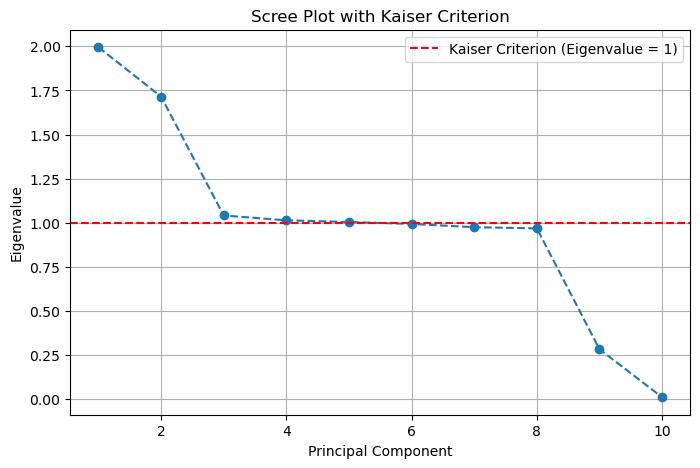

In [ ]:
# Scree Plot with Kaiser Criterion

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser Criterion (Eigenvalue = 1)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot with Kaiser Criterion')
plt.legend()
plt.grid()
plt.show();


### Total Variance

In [28]:
# Identify the principal components with eigenvalues > 1
num_components_kaiser = sum(explained_variance > 1)

# Cumulative variance for components retained by Kaiser Criterion
total_variance_kaiser = sum(explained_variance_ratio[:num_components_kaiser])
print(f"Total variance captured by the components (Kaiser Criterion): {total_variance_kaiser:.4%}")


Total variance captured by the components (Kaiser Criterion): 67.6819%
